In [1]:
#Import all the necessary modules
from pandas import read_csv
from sklearn.utils import resample
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split ,cross_val_score
from sklearn.metrics import accuracy_score
from matplotlib import pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats
from sklearn import metrics
import sklearn.metrics as mt
from sklearn import cross_validation
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.ensemble import RandomForestClassifier
#from sklearn.ensemble import GradientBoostingClassifier
from sklearn import tree
import sklearn.preprocessing as prep
from sklearn import svm
from sklearn.naive_bayes import GaussianNB

/home/raj/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
Titanic_df = pd.read_csv("train.csv")
Titanic_df_TEST = pd.read_csv("test.csv")

In [3]:
Titanic_df.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
Titanic_df.info() , Titanic_df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


(None, (891, 12))

In [5]:
#Find Missing values,NAN values from the dataset

Titanic_df.isnull().sum()

Titanic_df_TEST.isnull().sum()



PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [6]:
Titanic_df_TEST.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [7]:
# Initialize label encoder and convert Sex variable to numeric
label_encoder = prep.LabelEncoder()
print(Titanic_df['Sex'].value_counts())
print(Titanic_df['Embarked'].mode()) # Find the most familiar embarked 

Titanic_df['Sex']  = label_encoder.fit_transform(Titanic_df["Sex"])
Titanic_df['Embarked'] = label_encoder.fit_transform(Titanic_df['Embarked'].fillna('S')) # replace the embarked

print(Titanic_df['Sex'].value_counts())
print(Titanic_df['Embarked'].value_counts())

# Update the age with its median acording to Male and Female
Titanic_df.loc[Titanic_df['Sex'] == 0, 'Age'] = Titanic_df['Age'].fillna(Titanic_df['Age'].where(Titanic_df.Sex==0).median())
Titanic_df.loc[Titanic_df['Sex'] == 1, 'Age'] = Titanic_df['Age'].fillna(Titanic_df['Age'].where(Titanic_df.Sex==1).median())


Titanic_df.isnull().sum()

Titanic_df.head()

male      577
female    314
Name: Sex, dtype: int64
0    S
dtype: object
1    577
0    314
Name: Sex, dtype: int64
2    646
0    168
1     77
Name: Embarked, dtype: int64


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [8]:
# Label encode the Test data set

# Initialize label encoder and convert Sex variable to numeric
label_encoder = prep.LabelEncoder()
print(Titanic_df_TEST['Sex'].value_counts())

Titanic_df_TEST['Sex']  = label_encoder.fit_transform(Titanic_df_TEST["Sex"])
Titanic_df_TEST['Embarked'] = label_encoder.fit_transform(Titanic_df_TEST['Embarked'].fillna('S')) 
print(Titanic_df_TEST['Sex'].value_counts())

# Update the age with its median acording to Male and Female
Titanic_df_TEST.loc[Titanic_df_TEST['Sex'] == 0, 'Age'] = Titanic_df_TEST['Age'].fillna(Titanic_df_TEST['Age'].where(Titanic_df_TEST.Sex==0).median())
Titanic_df_TEST.loc[Titanic_df_TEST['Sex'] == 1, 'Age'] = Titanic_df_TEST['Age'].fillna(Titanic_df_TEST['Age'].where(Titanic_df_TEST.Sex==1).median())


Titanic_df_TEST.isnull().sum()

male      266
female    152
Name: Sex, dtype: int64
1    266
0    152
Name: Sex, dtype: int64


PassengerId      0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [9]:
#drop these columns as these are not correlated with survived
if {'PassengerId','Ticket','Cabin'}.issubset(Titanic_df.columns):
    Titanic_df.drop(['PassengerId','Ticket','Cabin'],axis=1,inplace=True)
    
Titanic_df.columns

Index(['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
       'Embarked'],
      dtype='object')

In [10]:
# Drop Ticket,Cabin and Fare columns in the test dataset as well

if {'Ticket','Cabin'}.issubset(Titanic_df_TEST.columns):
    Titanic_df_TEST.drop(['Ticket','Cabin'],axis=1,inplace=True)

Titanic_df_TEST['Survived'] = 0

Titanic_df_TEST.columns ,Titanic_df_TEST.head(5)



(Index(['PassengerId', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare',
        'Embarked', 'Survived'],
       dtype='object'),
    PassengerId  Pclass                                          Name  Sex  \
 0          892       3                              Kelly, Mr. James    1   
 1          893       3              Wilkes, Mrs. James (Ellen Needs)    0   
 2          894       2                     Myles, Mr. Thomas Francis    1   
 3          895       3                              Wirz, Mr. Albert    1   
 4          896       3  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    0   
 
     Age  SibSp  Parch     Fare  Embarked  Survived  
 0  34.5      0      0   7.8292         1         0  
 1  47.0      1      0   7.0000         2         0  
 2  62.0      0      0   9.6875         1         0  
 3  27.0      0      0   8.6625         2         0  
 4  22.0      1      1  12.2875         2         0  )

In [11]:
Titanic_df.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.441268,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.018747,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,29.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [12]:
Titanic_df.corr()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
Survived,1.000000,-0.338481,-0.543351,-0.073296,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.338481,1.000000,0.131900,-0.338056,0.083081,0.018443,-0.549500,0.162098
Sex,-0.543351,0.131900,1.000000,0.095256,-0.114631,-0.245489,-0.182333,0.108262
Age,-0.073296,-0.338056,0.095256,1.000000,-0.236376,-0.176038,0.094161,-0.018329
SibSp,-0.035322,0.083081,-0.114631,-0.236376,1.000000,0.414838,0.159651,0.068230
Parch,0.081629,0.018443,-0.245489,-0.176038,0.414838,1.000000,0.216225,0.039798
Fare,0.257307,-0.549500,-0.182333,0.094161,0.159651,0.216225,1.000000,-0.224719
Embarked,-0.167675,0.162098,0.108262,-0.018329,0.068230,0.039798,-0.224719,1.000000


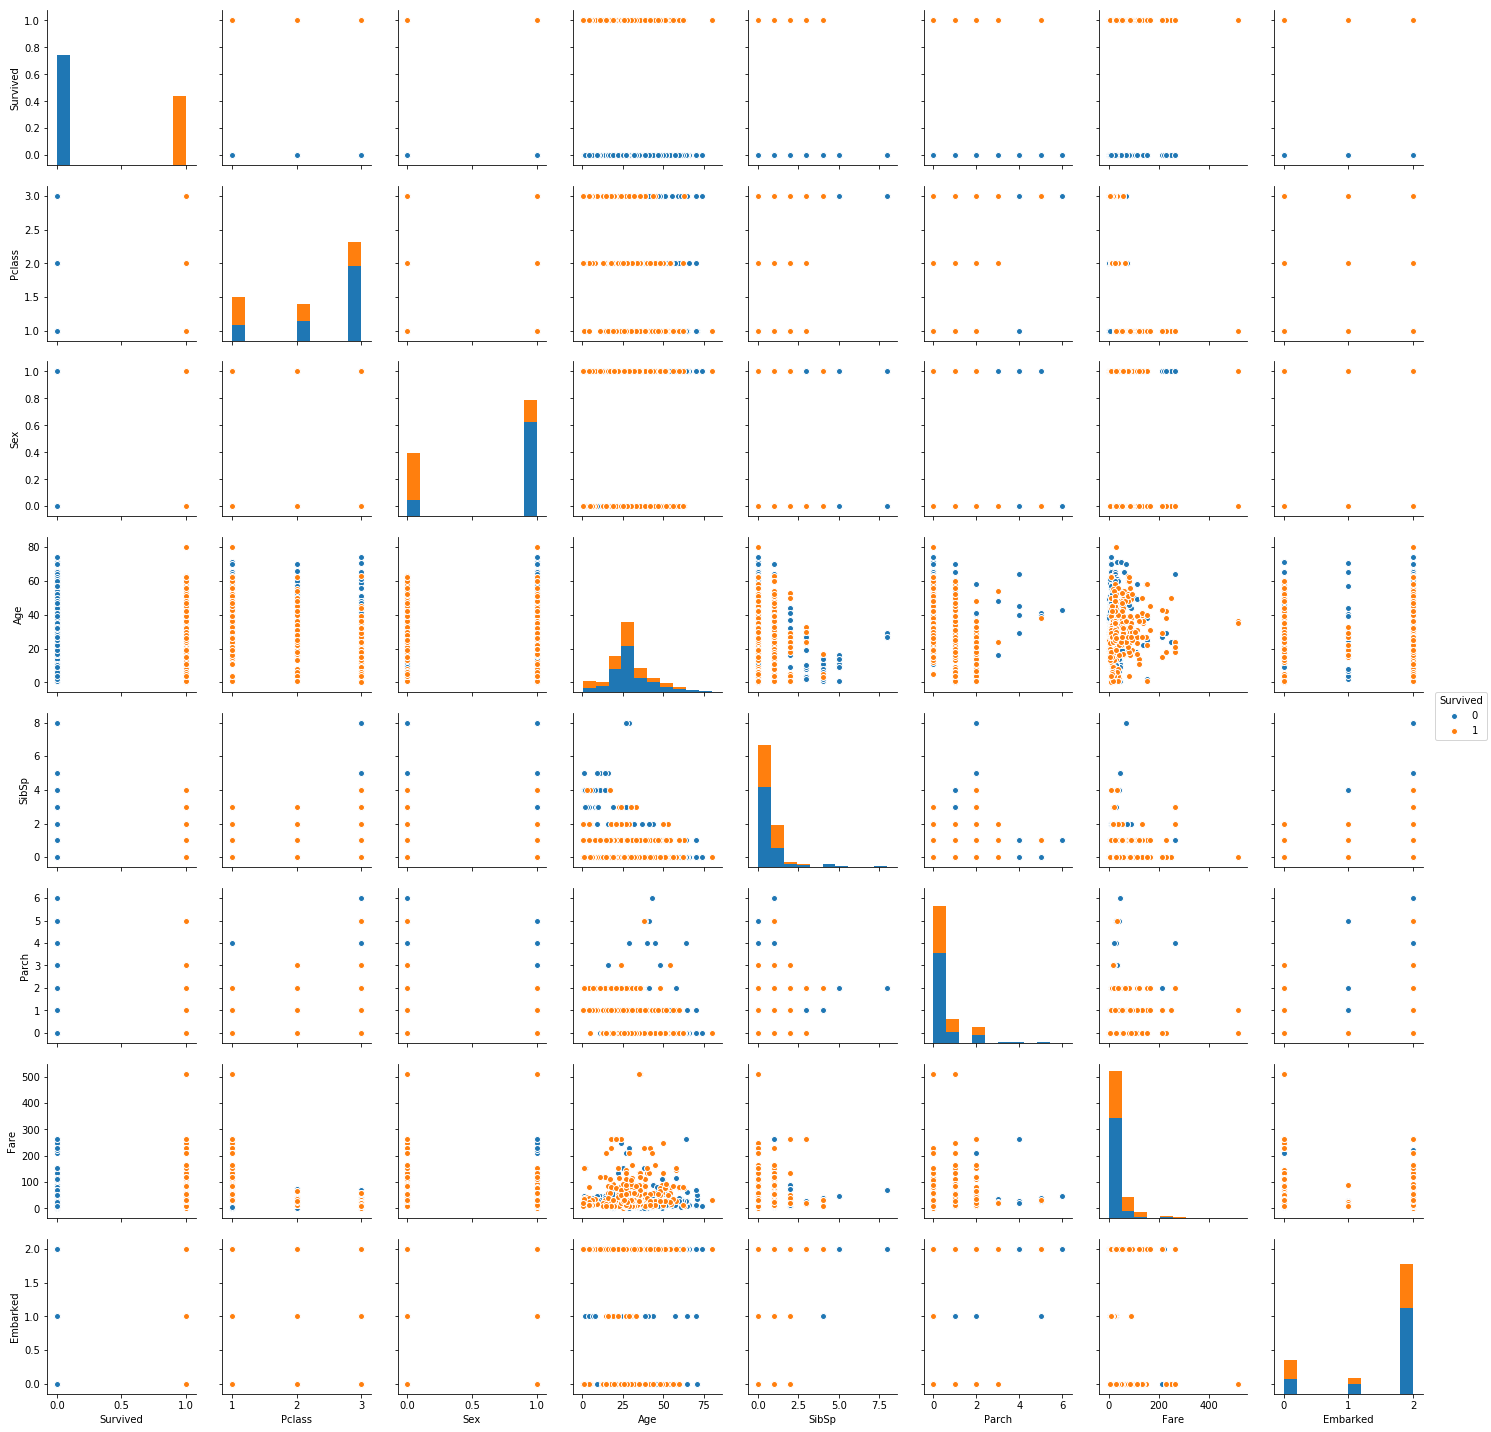

In [13]:
sns.pairplot(Titanic_df,hue="Survived")

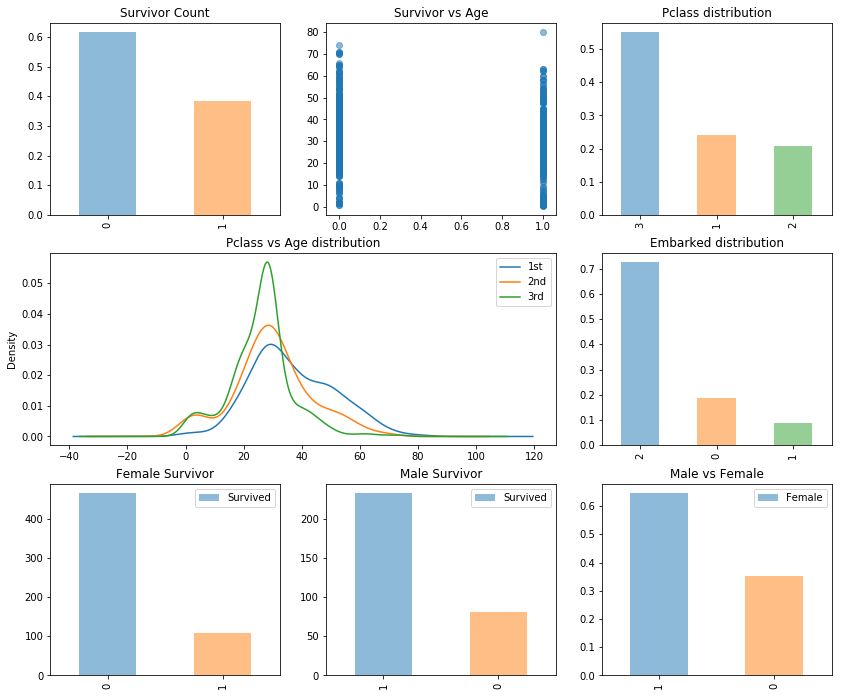

In [14]:
fig = plt.figure(figsize=(14,12))

plt.subplot2grid((3,3),(0,0))
plt.title("Survivor Count")
Titanic_df.Survived.value_counts(normalize=True).plot(kind="bar",alpha=0.5) # % Survivors

plt.subplot2grid((3,3),(0,1))
plt.title("Survivor vs Age")
plt.scatter(Titanic_df.Survived,Titanic_df.Age,alpha=0.5) # Survivor vs Age

plt.subplot2grid((3,3),(0,2))
plt.title("Pclass distribution")
Titanic_df.Pclass.value_counts(normalize=True).plot(kind="bar",alpha=0.5) # % Class

plt.subplot2grid((3,3),(1,0),colspan=2)
for x in (1,2,3):
    Titanic_df.Age[Titanic_df.Pclass ==x].plot(kind="kde")  # Kernel density 
plt.title("Pclass vs Age distribution")
plt.legend(("1st","2nd","3rd"))

plt.subplot2grid((3,3),(1,2))
plt.title("Embarked distribution")
Titanic_df.Embarked.value_counts(normalize=True).plot(kind="bar",alpha=0.5) # Embarked

plt.subplot2grid((3,3),(2,0))
plt.title("Female Survivor")
Titanic_df.Survived[Titanic_df.Sex == 1].value_counts().plot(kind="bar",alpha=0.5) # % Survivors Female
plt.legend(("Survived","Deceased"))

plt.subplot2grid((3,3),(2,1))
plt.title("Male Survivor")
Titanic_df.Survived[Titanic_df.Sex == 0].value_counts().plot(kind="bar",alpha=0.5) # % Survivors Male
plt.legend(("Survived","Deceased"))

plt.subplot2grid((3,3),(2,2))
plt.title("Male vs Female")
Titanic_df.Sex.value_counts(normalize=True).plot(kind="bar",alpha=0.5) # % Survivors
plt.legend(("Female","Male"))

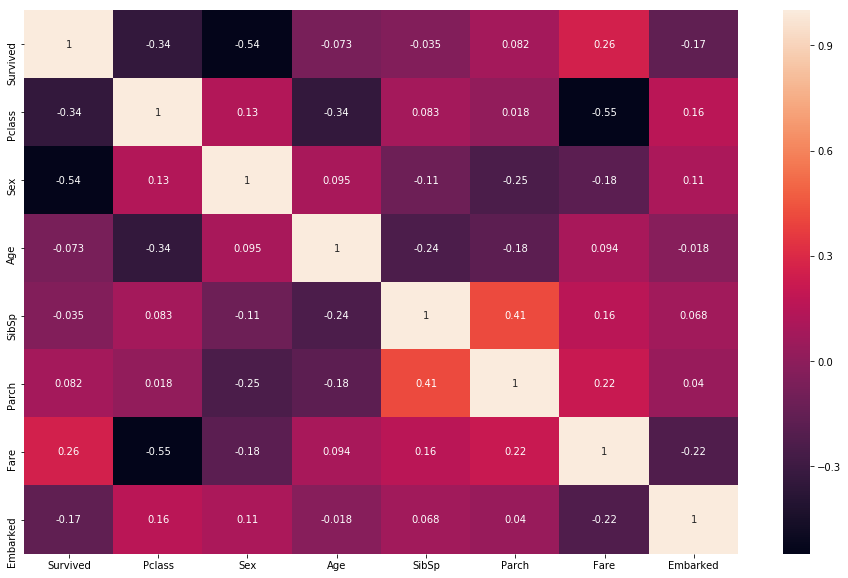

In [15]:
plt.figure(figsize=(16, 10))
sns.heatmap(Titanic_df.corr(), annot=True)


In [16]:
# Feature Selection 

from mlxtend.feature_selection import SequentialFeatureSelector as sfs

features = ["Pclass","Sex","Age","SibSp","Parch","Embarked","Survived"]
array = Titanic_df[features].values

array_Testset = Titanic_df_TEST[features].values

# do preprocessing

scaler = prep.MinMaxScaler()
scaled = scaler.fit_transform(array)

scaled_Testset = scaler.fit_transform(array_Testset)

# X stores feature values
X_full = scaled[:,0:6]
# Y stores Status
Y_full = scaled[:,6]

x_train, x_test, y_train, y_test = train_test_split(X_full, Y_full, test_size=0.30, random_state=1)

print('Training dataset shape:', x_train.shape, y_train.shape)
print('Testing dataset shape:', x_test.shape, y_test.shape)

logr = LogisticRegressionCV()
# Build step forward feature selection
sfs1 = sfs(logr, k_features=6, forward=True, scoring='accuracy', cv=5)
sfs1 = sfs1.fit(x_train, y_train)
results = sfs1.get_metric_dict()
pd.DataFrame(results).T

Training dataset shape: (623, 6) (623,)
Testing dataset shape: (268, 6) (268,)


,avg_score,ci_bound,cv_scores,feature_idx,feature_names,std_dev,std_err
1,0.801116,0.0390055,"[0.753968253968254, 0.8, 0.8467741935483871, 0...","(1,)","(1,)",0.0303476,0.0151738
2,0.801142,0.0453244,"[0.746031746031746, 0.8, 0.8548387096774194, 0...","(1, 3)","(1, 3)",0.0352639,0.0176319
3,0.812419,0.0478219,"[0.746031746031746, 0.808, 0.8548387096774194,...","(0, 1, 3)","(0, 1, 3)",0.0372071,0.0186035
4,0.823658,0.0565216,"[0.746031746031746, 0.84, 0.8790322580645161, ...","(0, 1, 3, 5)","(0, 1, 3, 5)",0.0439757,0.0219879
5,0.82673,0.044993,"[0.7936507936507936, 0.84, 0.8790322580645161,...","(0, 1, 2, 3, 5)","(0, 1, 2, 3, 5)",0.0350061,0.017503
6,0.831633,0.0414425,"[0.7777777777777778, 0.832, 0.8790322580645161...","(0, 1, 2, 3, 4, 5)","(0, 1, 2, 3, 4, 5)",0.0322436,0.0161218


In [227]:

# feature names that are having 
features = ["Pclass","Sex","Age","SibSp","Parch","Embarked","Survived"]
array = Titanic_df[features].values

array_Testset = Titanic_df_TEST[features].values

# do preprocessing

scaler = prep.MinMaxScaler()
scaled = scaler.fit_transform(array)

scaled_Testset = scaler.fit_transform(array_Testset)

# X stores feature values
X_full = scaled[:,0:6]
# Y stores Status
Y_full = scaled[:,6]

num_folds = 20
num_instances = len(X_full)
seed = 8
# use the 'accuracy' metric to evaluate models (correct / total)
scoring = 'accuracy'

# algorithms / models
models = []
models.append(('RF',RandomForestClassifier()))
models.append(('KN', KNeighborsClassifier()))
models.append(('LR', LogisticRegression()))
models.append(('NB', GaussianNB()))
#models.append(('sv', svm.SVC(kernel = 'linear', C = 100)))

# evaluate each algorithm / model
results = []
names = []
print("Kfold cross validation Scores for each algorithm:")
for name, model in models:
    kfold = cross_validation.KFold(n = num_instances, n_folds = num_folds, random_state = seed)
    cv_results = cross_val_score(model, X_full, Y_full, cv = kfold, scoring = scoring)
    results.append(cv_results)
    names.append(name)
    print(name,cv_results.mean())
    #model.fit(X_Fvalidation, Y_Fvalidation)
    #predictions = model.predict(X_Fvalidation)
    #print(name, accuracy_score(Y_Fvalidation, predictions)*100)
      


Kfold cross validation Scores for each algorithm:
RF 0.807070707070707
KN 0.8024747474747475
LR 0.7922727272727272
NB 0.7834848484848485


In [219]:
# Hyper parameter selection in Random Forest using Gridsearch

from sklearn.grid_search import GridSearchCV

rfcl =RandomForestClassifier()
parameters = { 'n_estimators': [200, 500],'max_features': ['auto', 'sqrt', 'log2'],'max_depth' : [4,5,6,7,8],'criterion' :['gini', 'entropy']}
GS = GridSearchCV(rfcl,parameters,cv=10)
GS.fit(X_Ftrain,Y_Ftrain)

GridSearchCV(cv=10, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params={}, iid=True, n_jobs=1,
       param_grid={'n_estimators': [200, 500], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [4, 5, 6, 7, 8], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring=None, verbose=0)

In [208]:
GS.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'auto',
 'n_estimators': 500}

In [240]:
rfcl1 =RandomForestClassifier(criterion= 'gini',max_depth=5,max_features='auto',n_estimators= 500)

validation_size = 0.3
# randomize which part of the data is training and which part is validation
seed = 5
# split dataset into training set (70%) and validation set (30%)
X_Ftrain, X_Fvalidation, Y_Ftrain, Y_Fvalidation = cross_validation.train_test_split(X_full, Y_full, test_size = validation_size, random_state = seed)

rfcl1.fit(X_Ftrain,Y_Ftrain)

pred=rfcl1.predict(X_Fvalidation)

print("Accuracy ",accuracy_score(Y_Fvalidation,pred))

# Lets run this against the Test set

# X stores feature values
X_full_Test = scaled_Testset[:,0:6]

# Y stores Status
Y_full_Test = scaled[:,6]


pred=rfcl1.predict(X_full_Test).astype(int)

Titanic_df_TEST['Survived'] = pred

Titanic_df_TEST.Survived.value_counts()

#print("Accuracy ",accuracy_score(Y_full_Test,pred))

Accuracy  0.8246268656716418


0    285
1    133
Name: Survived, dtype: int64

In [241]:
# Submitting to Kaggle

Submission = pd.DataFrame(Titanic_df_TEST[['PassengerId','Survived']])

Submission.to_csv("Submission_rf.csv", index=False)